# MARATÓN BEHIND THE CODE 2020

## DESAFÍO 2: TORTUGA CODE
### Solucion de Luis Marquez, Notebook demostrativo

### Introducción

Este notebook está basado en el codigo original puesto a disposición por los organizadores de la Maraton, 
y luego sobre él están todas las modificaciones y comentarios personales referentes a mi solucion particular,
utilicé tanto conocimientos previos como codigo que conseguí en varias paginas principalmente StackOverflow

En proyectos de ciencia de datos destinados a construir modelos de *aprendizaje automático*, o aprendizaje estadístico, es muy inusual que los datos iniciales ya estén en el formato ideal para la construcción de modelos. Se requieren varios pasos intermedios de preprocesamiento de datos, como la codificación de variables categóricas, normalización de variables numéricas, tratamiento de datos faltantes, etc. La biblioteca **scikit-learn**, una de las bibliotecas de código abierto más populares para *aprendizaje automático* en el mundo, ya tiene varias funciones integradas para realizar las transformaciones de datos más utilizadas. Sin embargo, en un flujo común de un modelo de aprendizaje automático, es necesario aplicar estas transformaciones al menos dos veces: la primera vez para "entrenar" el modelo, y luego nuevamente cuando se envían nuevos datos como entrada para ser clasificados por este modelo.


### Trabajando scikit-learn

In [2]:
# Primero, realizamos la instalación de scikit-learn 
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages (0.23.2)


You should consider upgrading via the 'c:\users\luis marquez\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [3]:
#importamos todas las librerias que vamos a utilizar
import requests
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from collections import Counter

### Importar  un .csv al proyecto

In [4]:
# Primero, importaremos el conjunto de datos proporcionado para el desafío, que ya está incluido en este proyecto.
df_training_dataset = pd.read_csv(r'dataset-tortuga-desafio-2.csv')
df_training_dataset.tail()

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
19995,20495,Rose Jurado,66754730,0.0,44.0,42.0,8.0,4.0,7.0,3.0,3.0,3.0,74.0,73.0,93.0,advanced_backend
19996,20496,Johnny Jones,6874888,0.0,85.0,63.0,3.0,5.0,0.0,4.0,7.0,3.0,50.0,83.0,94.0,advanced_front_end
19997,20497,Lawrence Givens,83752787,32.0,50.0,22.0,0.0,4.0,0.0,6.0,2.0,3.0,61.0,81.0,75.0,advanced_backend
19998,20498,Betty Diclaudio,45806698,0.0,96.0,69.0,3.0,3.0,3.0,5.0,7.0,4.0,64.0,68.0,68.0,advanced_front_end
19999,20499,Connie Harper,67068866,51.0,24.0,36.0,4.0,2.0,7.0,0.0,0.0,2.0,63.0,61.0,87.0,advanced_data_science


Tenemos 16 columnas presentes en el set de datos proporcionado, 15 de las cuales son variables features (datos de entrada) y una de ellas es una variable target (que queremos que nuestro modelo va a predecir).

Las variables features son:

    Unnamed: 0                          - Esta columna no tiene nombre y debe ser eliminada del dataset
    NAME                                - Nombre del estudiante
    USER_ID                             - Número de identificación del estudiante
    HOURS_DATASCIENCE                   - Número de horas de estudio en Data Science
    HOURS_BACKEND                       - Número de horas de estudio en Web (Back-End)
    HOURS_FRONTEND                      - Número de horas de estudio en Web (Front-End)
    NUM_COURSES_BEGINNER_DATASCIENCE    - Número de cursos de nivel principiante en Data Science completados por el estudiante
    NUM_COURSES_BEGINNER_BACKEND        - Número de cursos de nivel principiante en Web (Back-End) completados por el estudiante
    NUM_COURSES_BEGINNER_FRONTEND       - Número de cursos de nivel principiante en Web (Front-End) completados por el estudiante
    NUM_COURSES_ADVANCED_DATASCIENCE    - Número de cursos de nivel avanzado en Data Science completados por el estudiante
    NUM_COURSES_ADVANCED_BACKEND        - Número de cursos de nivel avanzado en Web (Back-End) completados por el estudiante
    NUM_COURSES_ADVANCED_FRONTEND       - Número de cursos de nivel avanzado en Web (Front-End) completados por el estudiante
    AVG_SCORE_DATASCIENCE               - Promedio acumulado en cursos de Data Science completados por el estudiante
    AVG_SCORE_BACKEND                   - Promedio acumulado en cursos de Web (Back-End) completados por el estudiante
    AVG_SCORE_FRONTEND                  - Promedio acumulado en cursos de Web (Front-End) completados por el estudiante
    
La variable target es:

    PROFILE                             - Perfil de carrera del estudiante (puede ser uno de 6)
    
        - beginner_front_end
        - advanced_front_end
        - beginner_back_end
        - advanced_back_end
        - beginner_data_science
        - advanced_data_science
        
Con un modelo capaz de clasificar a un alumno en una de estas categorías, podemos recomendar contenidos a los alumnos de forma personalizada según las necesidades de cada alumno.

### Explorando los datos proporcionados

Podemos continuar la exploración de los datos proporcionados con la función ``info()``:

In [5]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        20000 non-null  int64  
 1   NAME                              20000 non-null  object 
 2   USER_ID                           20000 non-null  int64  
 3   HOURS_DATASCIENCE                 19986 non-null  float64
 4   HOURS_BACKEND                     19947 non-null  float64
 5   HOURS_FRONTEND                    19984 non-null  float64
 6   NUM_COURSES_BEGINNER_DATASCIENCE  19974 non-null  float64
 7   NUM_COURSES_BEGINNER_BACKEND      19982 non-null  float64
 8   NUM_COURSES_BEGINNER_FRONTEND     19961 non-null  float64
 9   NUM_COURSES_ADVANCED_DATASCIENCE  19998 non-null  float64
 10  NUM_COURSES_ADVANCED_BACKEND      19992 non-null  float64
 11  NUM_COURSES_ADVANCED_FRONTEND     19963 non-null  float64
 12  AVG_

### Visualización (visualizations)

Para ver el conjunto de datos suministrado, podemos usar las bibliotecas ``matplotlib`` y ``seaborn``:

In [8]:
# magic function para mostrar los graficos de matplotlib sin llamar al metodo .show()
%matplotlib inline 

Graficas de distribucion de cada columna para tener una primera visualización de los datos. 
Se utiliza el metodo .dropna() para remover los datos nulos y poder correr la grafica

<AxesSubplot:xlabel='HOURS_FRONTEND', ylabel='Count'>

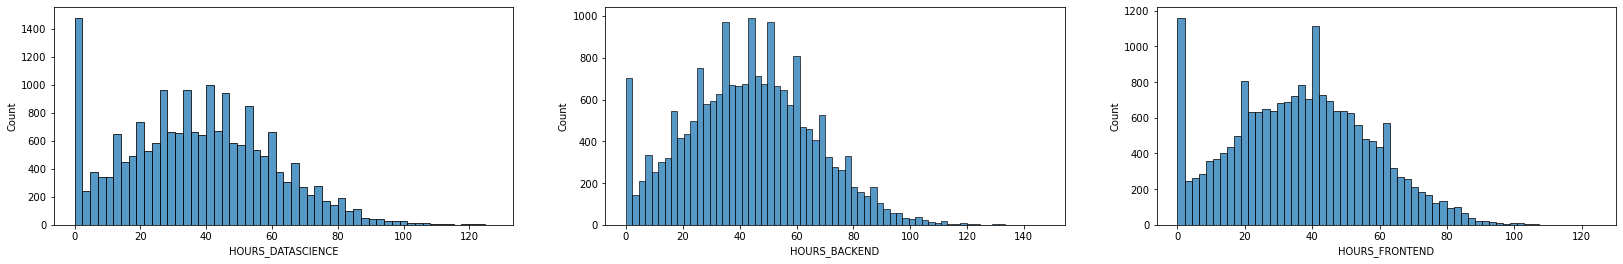

In [13]:
#para realizar estas graficas usamos matplotlib y seaborn
#declaramos dos objetos, fig y axes, utilizando el metodo subplots, para graficar 3 figuras en una misma visualización
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 4))

sns.histplot(df_training_dataset['HOURS_DATASCIENCE'].dropna(), ax=axes[0])
sns.histplot(df_training_dataset['HOURS_BACKEND'].dropna(), ax=axes[1])
sns.histplot(df_training_dataset['HOURS_FRONTEND'].dropna(), ax=axes[2])

<AxesSubplot:xlabel='NUM_COURSES_ADVANCED_FRONTEND', ylabel='Count'>

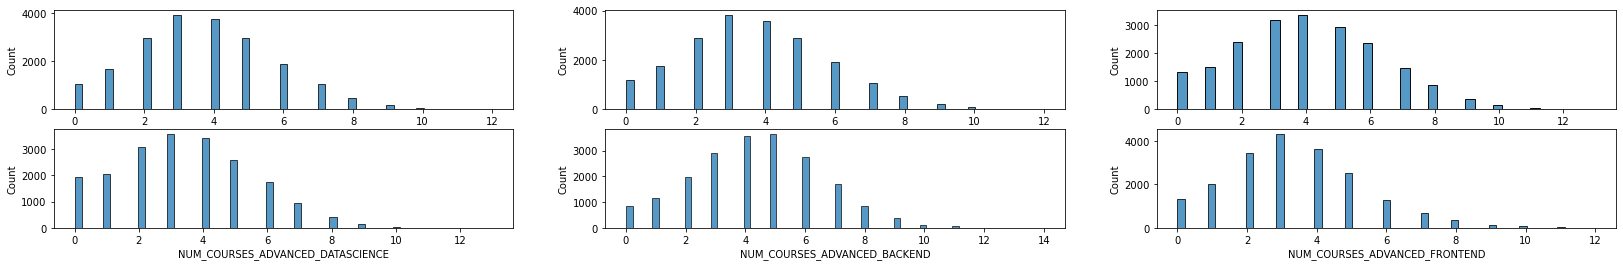

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(28, 4))

sns.histplot(df_training_dataset['NUM_COURSES_BEGINNER_DATASCIENCE'].dropna(), ax=axes[0][0])
sns.histplot(df_training_dataset['NUM_COURSES_BEGINNER_BACKEND'].dropna(), ax=axes[0][1])
sns.histplot(df_training_dataset['NUM_COURSES_BEGINNER_FRONTEND'].dropna(), ax=axes[0][2])
sns.histplot(df_training_dataset['NUM_COURSES_ADVANCED_DATASCIENCE'].dropna(), ax=axes[1][0])
sns.histplot(df_training_dataset['NUM_COURSES_ADVANCED_BACKEND'].dropna(), ax=axes[1][1])
sns.histplot(df_training_dataset['NUM_COURSES_ADVANCED_FRONTEND'].dropna(), ax=axes[1][2])

<AxesSubplot:xlabel='AVG_SCORE_FRONTEND', ylabel='Count'>

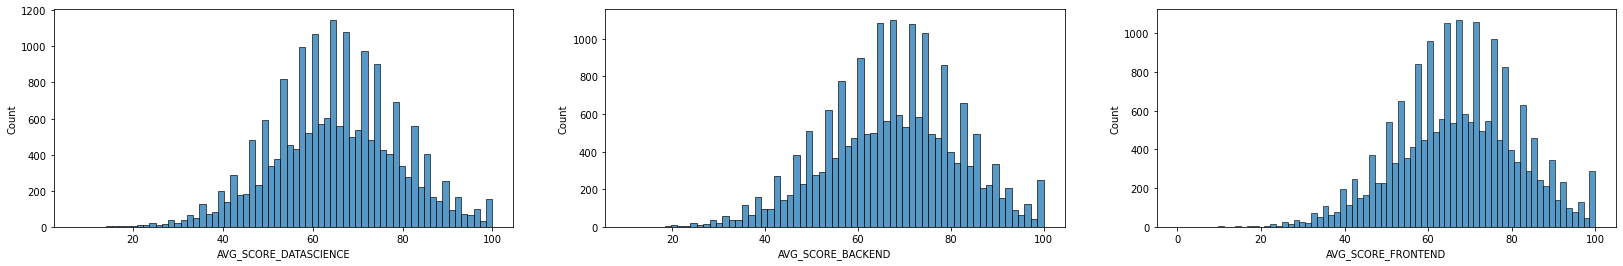

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 4))

sns.histplot(df_training_dataset['AVG_SCORE_DATASCIENCE'].dropna(), ax=axes[0])
sns.histplot(df_training_dataset['AVG_SCORE_BACKEND'].dropna(), ax=axes[1])
sns.histplot(df_training_dataset['AVG_SCORE_FRONTEND'].dropna(), ax=axes[2])

<AxesSubplot:xlabel='PROFILE', ylabel='count'>

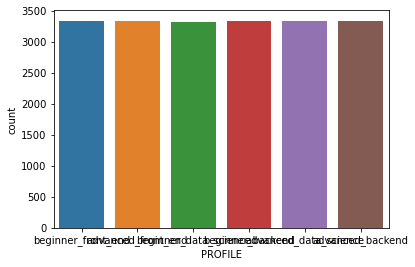

In [21]:
#grafica de conteo de categorios en la columna profile, para saber si las categorias están balanceadas en el dataframe

sns.countplot(x='PROFILE', data=df_training_dataset)

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


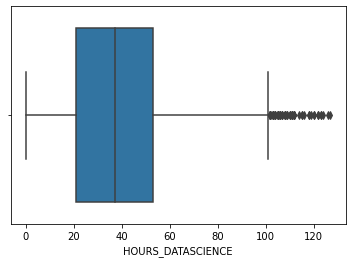

In [22]:
# grafica de caja, en la cual se pueden visualizar si existen Outliers, que son puntos de la muestra que estan muy alejados del 75% de ella, los cuales pueden interferir con el modelo de predicción
fig = plt.plot(figsize=(28, 4))

sns.boxplot(df_training_dataset['HOURS_DATASCIENCE'].dropna())
plt.show()

Feature: 0, Score: 0.02723
Feature: 1, Score: 0.02702
Feature: 2, Score: 0.09503
Feature: 3, Score: 0.09839
Feature: 4, Score: 0.08731
Feature: 5, Score: 0.06314
Feature: 6, Score: 0.07518
Feature: 7, Score: 0.07456
Feature: 8, Score: 0.05794
Feature: 9, Score: 0.07219
Feature: 10, Score: 0.06517
Feature: 11, Score: 0.09198
Feature: 12, Score: 0.07405
Feature: 13, Score: 0.09082


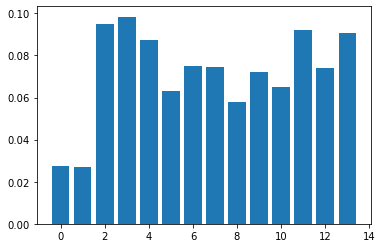

In [23]:
#En esta celda hacemos un analisis exploratorio sobre el feature importance arrojado de un modelo random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
df_training_dataset2 = df_training_dataset.dropna(inplace = False)
#fit the model
model.fit(df_training_dataset2[['Unnamed: 0', 'USER_ID', 'HOURS_DATASCIENCE', 'HOURS_BACKEND',
       'HOURS_FRONTEND', 'NUM_COURSES_BEGINNER_DATASCIENCE',
       'NUM_COURSES_BEGINNER_BACKEND', 'NUM_COURSES_BEGINNER_FRONTEND',
       'NUM_COURSES_ADVANCED_DATASCIENCE', 'NUM_COURSES_ADVANCED_BACKEND',
       'NUM_COURSES_ADVANCED_FRONTEND', 'AVG_SCORE_DATASCIENCE',
       'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND']], df_training_dataset2['PROFILE'])

#el modelo utilizado cuenta con un metodo que devuelve una lista con la importancia relativa de cada feature sobre el modelo de clasificación construido
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Preprocesamiento de datos

Luego de haber visualizado los datos, y obtenido la información necesaria para hacer nuestras hipotesis sobre
los datos,pasaremos a hacer los procesamientos adecuados para transformar el dataframe y adecuarlo al modelo que elegirmeos mas adelante, para eso vamos a utilizar de igual manera parte del codigo generado por IBM junto a las modificaciones que le he añadido.

In [24]:
#transformación personalizada de sklearn, IBM la incluía como parte del codigo necesario para realizar un pipeline de los procesos
#en la ultima version del desafio no era completamente necesario usar el pipeline pero igual usé la transformación ya creada

#para las transformaciones personalizadas de sklearn se debe importar lo siguiente
from sklearn.base import BaseEstimator, TransformerMixin


#todas las transformaciones de sklear deben tener los metodos fit y transform, que es la forma de operar sobre los objetos
#se instancia una clase con el nombre DropColumns con argumentos (BaseEstimator, TransformerMixin)
class DropColumns(BaseEstimator, TransformerMixin):
    #se define el metodo __init__ con sus respectivos argumentos, siendo columns el que pasaremos al instanciar el objeto.
    def __init__(self, columns):
        self.columns = columns
    #Se define el metodo fit, que en este caso no lleva ningun codigo sobre el pero es condicion para que la transformación funcione sin problemas
    def fit(self, X, y=None):
        return self
    #definimos el metodo transform sobre el cual haremos la transformacion para eliminar columnas. como argumento usamos "X" el cual al llamar el metodo pasaremos el dataframe como argumento
    def transform(self, X):
        # Primero copiamos el dataframe de datos de entrada 'X'
        data = X.copy()
        # Devolvemos un nuevo dataframe de datos sin las columnas no deseadas usando el metodo drop de pandas dataframes
        return data.drop(labels=self.columns, axis='columns')

In [36]:
#definimos otra transformación personalizada, esta vez es una para detectar y remover Outliers en nuestro conjunto de datos
#igual que la anterior definimos la clase y sus argumentos junto a los metodos fit y transform
class OutlierExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        print('init')
    #en este caso pasamos como argumentos X y Y ya que necesitmaos eliminar las filas completas asi que hay que eliminar los outliers tanto de los features como del target para mantener el numero de filas iguales
    def fit(self, X, Y):
        return self

    def transform(self, X, Y):
        # Primero copiamos el dataframe de datos de entrada 'X' y el de objetivo "Y"
        X2 = X.to_numpy()
        Y2 = Y.to_numpy()
        print(X2.shape)
        #utilizamos un IsolationForest de sklearn para hacer una seleccion de los datos que se ajusten dentro de una distribucion dejando por fuera los outliers
        iso = IsolationForest(n_estimators=200,contamination=0.3,random_state=42)
        #definimos yhat como las predicciones del objeto iso sobre el dataframe
        yhat = iso.fit_predict(X)
        #definimos mask como una lista que itera sobre yhat dejando solo los valores distintos de -1 el cual es el valor de outlier otorgado por las predicciones de iso
        mask = yhat != -1
        #con la lista mask procedemos a guardar X y Y en nuevas variables con solo los indices de fila que estan presentes en mask
        X2, Y2 = X2[mask, :], Y2[mask]
        #imprimimos el shape de x2 y y2 para saber si tienen igual numero de filas
        print(X2.shape)
        print(Y2.shape)
        #reestructuramos X2 como un dataframe
        X_train2 = pd.DataFrame.from_records(data=X2,columns=X.columns)
        Y_train2 = Y2
        #retornamos tanto los features como el target con los outliers eliminados
        return (X_train2, Y_train2)

In [26]:
df_training_dataset.columns

Index(['Unnamed: 0', 'NAME', 'USER_ID', 'HOURS_DATASCIENCE', 'HOURS_BACKEND',
       'HOURS_FRONTEND', 'NUM_COURSES_BEGINNER_DATASCIENCE',
       'NUM_COURSES_BEGINNER_BACKEND', 'NUM_COURSES_BEGINNER_FRONTEND',
       'NUM_COURSES_ADVANCED_DATASCIENCE', 'NUM_COURSES_ADVANCED_BACKEND',
       'NUM_COURSES_ADVANCED_FRONTEND', 'AVG_SCORE_DATASCIENCE',
       'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND', 'PROFILE'],
      dtype='object')

In [27]:
# Creación de instancias de una transformación DropColumns
#eliminamos las columnas name, unnamed y user id porque no aportan informacion al modelo, en el Feature Importance se vio que ambas no aportaban mucho al modelo

rm_columns = DropColumns(
    columns=["NAME", "Unnamed: 0",'USER_ID']  # Esta transformación toma como parámetro una lista con los nombres de las columnas no deseadas
)

print(rm_columns)

DropColumns(columns=['NAME', 'Unnamed: 0', 'USER_ID'])


In [28]:
# Ver las columnas del conjunto de datos original
print("Columnas del conjunto de datos original: \n")
print(df_training_dataset.columns)

Columnas del conjunto de datos original: 

Index(['Unnamed: 0', 'NAME', 'USER_ID', 'HOURS_DATASCIENCE', 'HOURS_BACKEND',
       'HOURS_FRONTEND', 'NUM_COURSES_BEGINNER_DATASCIENCE',
       'NUM_COURSES_BEGINNER_BACKEND', 'NUM_COURSES_BEGINNER_FRONTEND',
       'NUM_COURSES_ADVANCED_DATASCIENCE', 'NUM_COURSES_ADVANCED_BACKEND',
       'NUM_COURSES_ADVANCED_FRONTEND', 'AVG_SCORE_DATASCIENCE',
       'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND', 'PROFILE'],
      dtype='object')


In [29]:
# Aplicar la transformación ``DropColumns`` al conjunto de datos base
rm_columns.fit(X=df_training_dataset)

# Reconstruyendo un DataFrame de Pandas con el resultado de la transformación
df_training_dataset_2 = pd.DataFrame.from_records(
    data=rm_columns.transform(
        X=df_training_dataset
    ),
)

In [30]:
# Ver las columnas del conjunto de datos transformado
print("Columnas del conjunto de datos después de la transformación ``DropColumns``: \n")
print(df_training_dataset_2.columns)

Columnas del conjunto de datos después de la transformación ``DropColumns``: 

Index(['HOURS_DATASCIENCE', 'HOURS_BACKEND', 'HOURS_FRONTEND',
       'NUM_COURSES_BEGINNER_DATASCIENCE', 'NUM_COURSES_BEGINNER_BACKEND',
       'NUM_COURSES_BEGINNER_FRONTEND', 'NUM_COURSES_ADVANCED_DATASCIENCE',
       'NUM_COURSES_ADVANCED_BACKEND', 'NUM_COURSES_ADVANCED_FRONTEND',
       'AVG_SCORE_DATASCIENCE', 'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND',
       'PROFILE'],
      dtype='object')


Otra transformacion que haremos es la de reemplazar los datos nulos o faltantes del DataFrame, usaremos una transformación lista para usar de la biblioteca scikit-learn, llamada **SimpleImputer**.

Esta transformación permite varias estrategias para el tratamiento de datos faltantes. La documentación oficial se puede encontrar en: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [31]:
# Crear un objeto ``SimpleImputer``
si = SimpleImputer(
    missing_values=np.nan,  # los valores que faltan son del tipo ``np.nan`` (Pandas estándar)
    strategy='mean',  # la estrategia elegida es cambiar el valor faltante por la media de cada columna de datos
    verbose=0,
    copy=True
)

### Entrenando un modelo de clasificación

Una vez finalizado el preprocesamiento, ya tenemos el conjunto de datos en el formato necesario para entrenar nuestro modelo:
Hay tres transformaciones que haremos pero necesitamos primero separar el Dataframe en Features y Target

#### Definición de features del modelo

In [38]:
# Definición de las columnas que seran features
features = [
    "HOURS_DATASCIENCE", "HOURS_BACKEND", "HOURS_FRONTEND",
    "NUM_COURSES_BEGINNER_DATASCIENCE", "NUM_COURSES_BEGINNER_BACKEND", "NUM_COURSES_BEGINNER_FRONTEND",
    "NUM_COURSES_ADVANCED_DATASCIENCE", "NUM_COURSES_ADVANCED_BACKEND", "NUM_COURSES_ADVANCED_FRONTEND",
    "AVG_SCORE_DATASCIENCE", "AVG_SCORE_BACKEND", "AVG_SCORE_FRONTEND"
]

# Definición de variable objetivo o Target
target = ['PROFILE']

# Preparación de los argumentos para los métodos de la biblioteca ``scikit-learn``
X = df_training_dataset_2[features]
y = df_training_dataset_2[target]

In [39]:
#la primera transformacion luego de separar los datos es el Simple Imputer

si.fit(X=X)

# Reconstrucción de un nuevo DataFrame de Pandas con el conjunto imputado (df_data_3)
X = pd.DataFrame.from_records(
    data=si.transform(
        X=X
    ),  # el resultado SimpleImputer.transform (<< pandas dataframe >>) es lista lista
    columns=features  # las columnas originales deben conservarse en esta transformación
)


In [40]:
#la segunda transformacion es el OutLierExtractor que ya definimos antes

outlier = OutlierExtractor()
outlier.fit(X=X, Y=y)
X, y = outlier.transform(X=X , Y=y)

init
(20000, 12)
(14000, 12)
(14000, 1)


In [41]:
#la tercera transformacion es escalar todas las columnas para que esten en el mismo orden de magnitug, para eso utilizamos el objeto RobustScaler de sklearn
#hay muchas formas de hacer este proceso, y muchos rangos, en este se normaliza, llevandolo a una distribucion normal con media 0 y varianza 1. pero se puede utilizar otros metodos que escalan los datos en otros rangos de valores.
#el uso de esta transformacion se debe a que elimina un poco el sesgo que se puede crear cuando el modelo se esta construyendo ya que éste puede tomar como mas importantes las variables que tengan mayor orden de magnitud. En este caso usamos un RandomForest que segun la documentacion no se ve muy afectado por este tipo de sesgos pero de igual forma hacemos la transformacion
sc = RobustScaler()
X = pd.DataFrame.from_records(
    data=sc.fit_transform(X),  # el resultado SimpleImputer.transform (<< pandas dataframe >>) es lista lista
    columns=features  # las columnas originales deben conservarse en esta transformación
)


El conjunto de entrada (X):

In [42]:
X.head()

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
0,-1.107143,-0.168602,-0.296296,-0.666667,0.0,-2.0,-0.333333,0.333333,-1.5,1.187500,0.411765,0.000000
1,-0.071429,-0.909343,-0.333333,-1.333333,0.5,1.5,-1.000000,0.333333,0.0,0.004395,0.235294,1.286427
2,-0.500000,0.942509,1.148148,-0.333333,1.5,-2.0,0.333333,0.333333,-1.5,0.062500,0.470588,0.000000
3,-1.357143,-0.057491,-0.888889,-1.333333,0.5,0.5,-1.000000,0.333333,0.0,0.004395,0.411765,-0.007691
4,0.071429,-0.872306,-0.111111,-1.333333,0.5,-1.0,-1.000000,1.000000,-1.5,0.004395,-0.823529,-0.125338


La variable objetivo (y):

In [43]:
y

array([['beginner_front_end'],
       ['beginner_data_science'],
       ['advanced_front_end'],
       ...,
       ['advanced_backend'],
       ['advanced_front_end'],
       ['advanced_data_science']], dtype=object)

#### Separar el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba

Separaremos el conjunto de datos provisto en dos grupos: uno para entrenar nuestro modelo y otro para probar el resultado a través de una prueba ciega. La separación del conjunto de datos se puede hacer fácilmente con el método *train_test_split ()* de scikit-learn:

In [44]:
# Separación de datos en conjunto de entrenamiento y conjunto de pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=337)

#### Creando un modelo basado en un conjunto de árboles de decisión, llamado Ranfom Forest

In [45]:
# Método para creacion de modelos basados Random Forest
from sklearn.ensemble import RandomForestClassifier


dtc = RandomForestClassifier(n_estimators=800, random_state=42 ).fit(X_train, y_train.ravel())


In [46]:
# Realización de una prueba a ciegas en el modelo creado, donde pasamos como argumento el set de pruebas
y_pred = dtc.predict(X_test)

In [47]:
X_test.head()

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
3793,-0.321429,0.535101,-0.740741,0.333333,-0.5,1.500000,0.000000,1.000000,0.0,-0.8750,-0.058824,-0.478279
9485,0.250000,0.461027,-0.259259,0.000000,2.0,0.000000,1.000000,0.333333,-0.5,-0.3750,0.352941,-0.772397
6129,-0.178571,0.498064,-0.444444,0.000000,-2.0,-2.000000,0.000000,0.000000,1.0,-0.8125,0.294118,0.992309
1003,-0.428571,-0.168602,-0.148148,0.000000,0.5,0.000000,0.666667,-0.333333,2.0,0.6250,1.411765,0.462897
5727,0.178571,0.757324,1.074074,0.333333,1.0,0.024147,0.333333,-0.333333,-0.5,-1.0000,1.823529,0.404074


In [48]:
print(y_pred)

['advanced_data_science' 'advanced_front_end' 'beginner_backend' ...
 'advanced_front_end' 'beginner_data_science' 'advanced_front_end']


In [49]:
from sklearn.metrics import accuracy_score

# Precisión lograda por el árbol de decisiones, este mide la diferencia entre los valores predichos por el modelo y los reales que estan en el dataframe para ver la cantidad de error que pueda haber sobre esa determinada muestra
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, y_pred), 2)))

Exactitud: 89.0%


Esta exactitud nos dice que porcentaje de los valores de salida del modelo se corresponden con los reales del set de prueba
un 89% es un valor medio-alto para un modelo, aunque esto depende mucho de cada caso particular.
Valores muy altos de exactitud pueden derivar en Overfitting, que sucede cuando el modelo se ajusta demasiado al set de prueba
lo que no es una buena practica ya que al hacer predicciones sobre datos no vistos, en producción, ese ovefitting puede generar
errores y sesgos que hagan impreciso el modelo.
y un valor muy bajo tampoco funciona ya que no estariamos prediciendo el comportamiento de la variable objetivo.

<hr>

Luego de tener todo el modelo y sus transformaciones el Desafio proporcionaba otro dataset 
para ser evaluado por este modelo y añadirle las predicciones. sobre esa hoja se hicieron las evaluaciones.

En casos de uso, se trabaja de la misma forma, teniendo el modelo entrenado se le puede alimentar con nuevos datos para
obeter la prediccion de categoria que es lo que nos interesa. Por supuesto para cualquie nueva data que le sea ingresada
se debe tener cuidado en que tenga la misma estructura que el dataframe de entrenamiento. utilizando las transformaciones de columnas y escala
para que los resultados sean coherentes.